In [312]:
import os
import re
import gc 
from tqdm import tqdm
from datetime import date     #calculating age
from datetime import datetime #converting string to date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score , make_scorer
from sklearn.preprocessing import StandardScaler,OneHotEncoder , LabelEncoder ,normalize
from sklearn.feature_selection import SelectKBest,f_classif,chi2
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
from matplotlib.pyplot import figure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Importing Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
    
#Bagging Algo
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#statistical Tools
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [156]:
import pandas as pd
import numpy as np
df = pd.read_csv('train.csv')
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [157]:
df.shape

(233154, 41)

In [158]:
df.shape[1]
df.shape[0]

233154

In [159]:
df['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

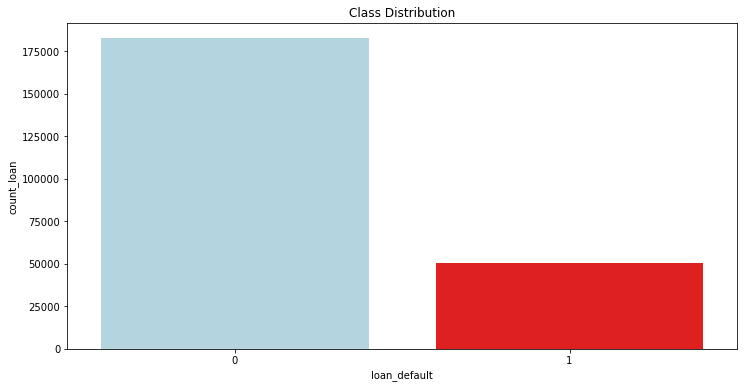

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

my_pal = {0:'lightblue',1:'red'}
my_pal

plt.figure(figsize = (12,6))
ax = sns.countplot(x='loan_default', data=df, palette=my_pal)
plt.title('Class Distribution')

plt.ylabel('count_loan')
plt.show()


In [161]:
df.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [163]:
df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [164]:
df['Employment.Type'].unique()

array(['Salaried', 'Self employed', nan], dtype=object)

In [165]:
df['Employment.Type'].isna().sum()

7661

In [166]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [167]:
df['Employment.Type'] = df['Employment.Type'].fillna(method='bfill')

In [168]:
df['Employment.Type'].value_counts()

Self employed    132002
Salaried         101152
Name: Employment.Type, dtype: int64

In [169]:
df.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [170]:
df['MobileNo_Avl_Flag']

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Name: MobileNo_Avl_Flag, Length: 233154, dtype: int64

In [171]:
print(df.columns)
df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')


array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

In [172]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].nunique()

20

In [173]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [174]:
df = df.replace({'PERFORM_CNS.SCORE.DESCRIPTION':{'C-Very Low Risk':'Low',
                                               'A-Very Low Risk':'Low',
                                               'D-Very Low Risk':'Low',
                                               'B-Very Low Risk':'Low',
                                               'F-Low Risk':'Low',
                                               'E-Low Risk':'Low',
                                               'G-Low Risk':'Low',
                                               'H-Medium Risk':'Medium',
                                               'I-Medium Risk':'Medium',
                                               'J-High Risk':'High',
                                               'K-High Risk':'High',
                                               'L-Very High Risk':'Very High',
                                               'M-Very High Risk':'Very High',
                                               'Not Scored: Sufficient History Not Available':'Not Scored',
                                               'Not Scored: Not Enough Info available on the customer':'Not Scored',
                                               'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored',
                                               'Not Scored: No Updates available in last 36 months':'Not Scored',
                                               'Not Scored: Only a Guarantor':'Not Scored',
                                               'Not Scored: More than 50 active Accounts found':'Not Scored',
                                                 'No Bureau History Available':'Not Scored'}})

In [175]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

Not Scored    129785
Low            69022
Medium         12412
High           12025
Very High       9910
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

In [176]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['Not Scored', 'Medium', 'Very High', 'Low', 'High'], dtype=object)

In [177]:
for i in df.columns:
    print('Distinct value for column:',i)
    print('Number of uique Item:',df[i].nunique())
    print(df[i].unique())
    print('  ')
    print('-'*50)
    print('  ')

Distinct value for column: UniqueID
Number of uique Item: 233154
[420825 537409 417566 ... 613658 548084 630213]
  
--------------------------------------------------
  
Distinct value for column: disbursed_amount
Number of uique Item: 24565
[50578 47145 53278 ... 61456 51406 34259]
  
--------------------------------------------------
  
Distinct value for column: asset_cost
Number of uique Item: 46252
[ 58400  65550  61360 ...  45233  52965 116009]
  
--------------------------------------------------
  
Distinct value for column: ltv
Number of uique Item: 6579
[89.55 73.23 89.63 ... 33.32 32.53 33.82]
  
--------------------------------------------------
  
Distinct value for column: branch_id
Number of uique Item: 82
[ 67  78  34 130  74  11   5  20  63  48  79   3  42 142  36  16 146 147
  65   9   1 152  29  10  70  19   7  85  61  17   8 153  18 162  68  72
  64   2 160 251 103 104 120 136  77  13 138 135  73 248  15 165  62  76
 105 249 250 255 254  82 158 159 117 202 259 207  

Number of uique Item: 2553
[      0 1690000     361 ... 3953133   64040   49246]
  
--------------------------------------------------
  
Distinct value for column: PRIMARY.INSTAL.AMT
Number of uique Item: 28067
[    0  1991    31 ... 22090 79611 23356]
  
--------------------------------------------------
  
Distinct value for column: SEC.INSTAL.AMT
Number of uique Item: 1918
[   0 9382 6485 ... 2665 3500 3558]
  
--------------------------------------------------
  
Distinct value for column: NEW.ACCTS.IN.LAST.SIX.MONTHS
Number of uique Item: 26
[ 0  1  4  2  6  3  9  5 14  8  7 13 22 10 11 12 35 17 28 15 19 23 16 20
 18 21]
  
--------------------------------------------------
  
Distinct value for column: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
Number of uique Item: 14
[ 0  1  2  3  5  4  7  6  8  9 12 10 20 11]
  
--------------------------------------------------
  
Distinct value for column: AVERAGE.ACCT.AGE
Number of uique Item: 192
['0yrs 0mon' '1yrs 11mon' '0yrs 8mon' '1yrs 9mon'

 Converting CREDIT HISTORY LEN and AVG ACCOUNT AGE into Numeric Format

In [178]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [179]:
df['AVERAGE.ACCT.AGE']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: object

In [180]:
df[['AVERAGE.ACCT.Yr','AVERAGE.ACCT.Month']] = df ['AVERAGE.ACCT.AGE'].str.split("yrs", expand=True)

In [181]:
df['AVERAGE.ACCT.Yr']
df['AVERAGE.ACCT.Month']

0           0mon
1          11mon
2           0mon
3           8mon
4           0mon
           ...  
233149      9mon
233150      6mon
233151      0mon
233152      0mon
233153      0mon
Name: AVERAGE.ACCT.Month, Length: 233154, dtype: object

In [182]:
df[['AVERAGE.ACCT.Month','AVERAGE.ACCT.Month1']] = df['AVERAGE.ACCT.Month'].str.split("mon",expand=True)

In [183]:
df["AVERAGE.ACCT.AGE"]=df["AVERAGE.ACCT.Yr"].astype(str).astype(int)+((df["AVERAGE.ACCT.Month"].astype(str).astype(int))/12)
df = df.drop(columns=['AVERAGE.ACCT.Yr','AVERAGE.ACCT.Month','AVERAGE.ACCT.Month1'])


In [184]:
df['AVERAGE.ACCT.AGE']

0         0.000000
1         1.916667
2         0.000000
3         0.666667
4         0.000000
            ...   
233149    1.750000
233150    0.500000
233151    0.000000
233152    0.000000
233153    0.000000
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: float64

In [185]:
df[['CREDIT.HISTORY.LENGTH.Yr','CREDIT.HISTORY.LENGTH.Month']] = df['CREDIT.HISTORY.LENGTH'].str.split("yrs",expand=True)
df[['CREDIT.HISTORY.LENGTH.Month','CREDIT_HISTORY_LENGTH_Month1']] = df['CREDIT.HISTORY.LENGTH.Month'].str.split("mon",expand=True)
df["CREDIT.HISTORY.LENGTH"]= df["CREDIT.HISTORY.LENGTH.Yr"].astype(str).astype(int)+((df["CREDIT.HISTORY.LENGTH.Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["CREDIT.HISTORY.LENGTH.Yr","CREDIT.HISTORY.LENGTH.Month",'CREDIT_HISTORY_LENGTH_Month1'])

In [186]:
df['CREDIT.HISTORY.LENGTH'].unique()

array([ 0.        ,  1.91666667,  1.25      ,  2.        ,  0.16666667,
        4.66666667,  1.58333333,  0.58333333,  2.25      ,  2.75      ,
        2.08333333,  7.16666667,  0.08333333,  5.5       ,  4.58333333,
        1.75      ,  0.91666667,  0.83333333,  5.83333333,  3.08333333,
        5.33333333,  4.83333333,  0.33333333,  4.        ,  3.75      ,
        2.91666667,  1.66666667,  5.16666667,  2.83333333,  1.16666667,
        1.41666667, 12.83333333,  2.16666667,  3.66666667,  7.41666667,
        1.        ,  4.16666667,  1.83333333,  0.5       ,  3.16666667,
        5.08333333,  4.25      ,  6.75      ,  1.08333333, 11.        ,
        0.75      ,  5.        , 11.16666667,  4.08333333,  1.33333333,
        4.75      , 12.91666667,  3.58333333,  2.41666667,  0.25      ,
        6.5       ,  1.5       ,  7.33333333, 19.25      ,  3.        ,
        4.5       ,  2.58333333,  2.66666667,  3.91666667,  4.91666667,
        8.08333333,  7.58333333,  6.58333333,  2.33333333,  3.83

In [187]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0.666667,1.250000,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0.000000,0.000000,1,1


In [188]:
df['Date.of.Birth']

0         01-01-84
1         31-07-85
2         24-08-85
3         30-12-93
4         09-12-77
            ...   
233149    01-08-88
233150    05-12-88
233151    01-06-76
233152    26-03-94
233153    18-02-84
Name: Date.of.Birth, Length: 233154, dtype: object

In [189]:
now = pd.Timestamp('now')
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format='%d-%m-%y')
df['Date.of.Birth'] = df['Date.of.Birth'].where(df['Date.of.Birth'] < now, df['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
df['AGE'] = (now - df['Date.of.Birth']).astype('<m8[Y]')


In [190]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'AGE'],
      dtype='object')

In [191]:
now = pd.Timestamp('now')
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format='%d-%m-%y')
df['DisbursalDate'] = df['DisbursalDate'].where(df['DisbursalDate'] < now, df['DisbursalDate'] -  np.timedelta64(100, 'Y'))
df['LOAN_AGE'] = (now - df['DisbursalDate']).astype('<m8[Y]')

In [192]:
df['LOAN_AGE']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
233149    2.0
233150    2.0
233151    2.0
233152    2.0
233153    2.0
Name: LOAN_AGE, Length: 233154, dtype: float64

C:\Users\jagdi\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

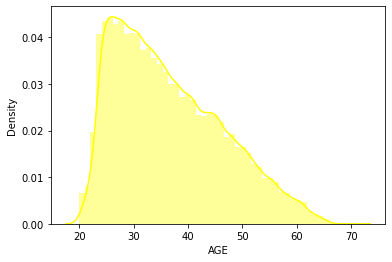

In [193]:
import seaborn as sns
sns.distplot(df['AGE'], color='yellow')

We can see from the graph that the Mean Age lies in the range of 20 - 30

SPLITTING THE DATASET INTO TRAIN-TEST

In [194]:
y=df['loan_default']
X= df.drop('loan_default', axis=1)
X.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,AGE,LOAN_AGE
0,420825,50578,58400,89.55,67,22807,45,1441,1984-01-01,Salaried,...,0,0,0,0,0,0.000000,0.000000,0,37.0,2.0
1,537409,47145,65550,73.23,67,22807,45,1502,1985-07-31,Self employed,...,0,1991,0,0,1,1.916667,1.916667,0,35.0,2.0
2,417566,53278,61360,89.63,67,22807,45,1497,1985-08-24,Self employed,...,0,0,0,0,0,0.000000,0.000000,0,35.0,2.0
3,624493,57513,66113,88.48,67,22807,45,1501,1993-12-30,Self employed,...,0,31,0,0,0,0.666667,1.250000,1,27.0,2.0
4,539055,52378,60300,88.39,67,22807,45,1495,1977-12-09,Self employed,...,0,0,0,0,0,0.000000,0.000000,1,43.0,2.0


In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [196]:
print('Size of x ', X_train.shape)
print('Size of x ',X_test.shape)
print('Size of y ',y_train.shape)
print('Size of y ',y_test.shape)

Size of x  (163207, 42)
Size of x  (69947, 42)
Size of y  (163207,)
Size of y  (69947,)


In [197]:
y_train_plot=pd.DataFrame(y_train,columns=['loan_default'])
y_test_plot=pd.DataFrame(y_test,columns=['loan_default'])

defaulters_train=y_train_plot['loan_default'].sum()
non_defaulters_train=len(y_train_plot)-y_train_plot['loan_default'].sum()
total_train=len(y_train_plot)
print(total_train)

defaulters_test=y_test_plot['loan_default'].sum()
non_defaulters_test=len(y_test_plot)-y_test_plot['loan_default'].sum()
total_test=len(y_test_plot)
print(total_test)

163207
69947


In [198]:
print("\n")
print("X_TRAIN INFO: Total:",total_train)
print("DEFAULTERS:",defaulters_train,"->",round(defaulters_train/total_train,2),"Percent")
print("Non-DEFAULTERS:",non_defaulters_train,"->",round(non_defaulters_train/total_train,2),"%")
print("\n")
print("X_TEST INFO: Total:",total_test)
print("DEFAULTERS:",defaulters_test,"->",round(defaulters_test/total_test,2),"Percent")
print("Non-DEFAULTERS:",non_defaulters_test,"->",round(non_defaulters_test/total_test,2),"%")



X_TRAIN INFO: Total: 163207
DEFAULTERS: 35420 -> 0.22 Percent
Non-DEFAULTERS: 127787 -> 0.78 %


X_TEST INFO: Total: 69947
DEFAULTERS: 15191 -> 0.22 Percent
Non-DEFAULTERS: 54756 -> 0.78 %


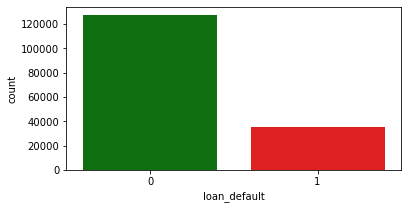

In [199]:

import seaborn as sns
my_pal = {0:'green', 1: 'red'}

plt.figure(figsize=(6,3))
ax = sns.countplot(x='loan_default', data=y_train_plot, palette=my_pal)
plt.show()

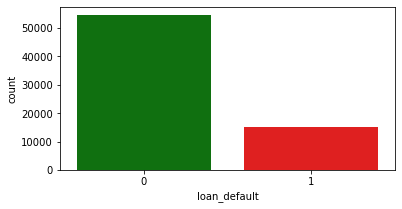

In [200]:

import seaborn as sns
my_pal = {0:'green', 1: 'red'}

plt.figure(figsize=(6,3))
ax = sns.countplot(x='loan_default', data=y_test_plot, palette=my_pal)
plt.show()

In [201]:
columnsToDelete = ['UniqueID','MobileNo_Avl_Flag','Current_pincode_ID',
                   'Employee_code_ID','State_ID','branch_id','manufacturer_id',
                   'supplier_id','Date.of.Birth','DisbursalDate','NO.OF_INQUIRIES']


In [202]:
## BEFORE DELETING THE COLUMNS
print("Size AFTER Deleting the Features",len(X_train.columns))

X_train = X_train.drop(X_train[columnsToDelete], axis =1) 

## AFTER DROPPING THE COLUMNS
print("Size AFTER Deleting the Features",len(X_train.columns))

Size AFTER Deleting the Features 42
Size AFTER Deleting the Features 31


-------------------------------------------------------------------

Listing the Numerical and Categorical Type Features.

In [203]:
X_train.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,AGE,LOAN_AGE
81759,56013,67722,85.64,Self employed,1,0,0,0,0,738,...,0,0,0,0,1,0,0.333333,0.333333,41.0,2.0
115977,53278,68455,79.76,Self employed,1,0,0,0,0,694,...,0,0,1932,0,0,0,0.583333,0.583333,26.0,2.0
51043,27929,62459,48.03,Salaried,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,41.0,2.0
18380,35275,64929,56.99,Self employed,1,0,0,0,0,690,...,0,0,0,0,2,0,1.333333,3.083333,57.0,2.0
192570,67582,81193,84.98,Self employed,1,0,0,0,0,681,...,0,0,3360,0,0,1,0.833333,0.916667,21.0,2.0


In [204]:
X_train.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'Employment.Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION',
       'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS',
       'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT',
       'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS',
       'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'AGE', 'LOAN_AGE'],
      dtype='object')

In [205]:
numericalTypes=['disbursed_amount', 'asset_cost', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'ltv',
           'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 
           'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 
           'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT',
       'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PERFORM_CNS.SCORE',
           'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'AGE', 'LOAN_AGE']

categoricalTypes=['Employment.Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION']

In [206]:
len(numericalTypes)

24

In [207]:
len(categoricalTypes)

7

In [208]:
X_train_numerical = X_train[numericalTypes].copy()
X_train_numerical

,disbursed_amount,asset_cost,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,ltv,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,AGE,LOAN_AGE
81759,56013,67722,1,1,85.64,0,6037,14500,14500,0,...,0,0,0,1,738,0,0.333333,0.333333,41.0,2.0
115977,53278,68455,2,1,79.76,0,67445,67445,67445,0,...,0,1932,0,0,694,0,0.583333,0.583333,26.0,2.0
51043,27929,62459,0,0,48.03,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,41.0,2.0
18380,35275,64929,10,2,56.99,0,21731,36990,36165,0,...,0,0,0,2,690,0,1.333333,3.083333,57.0,2.0
192570,67582,81193,2,1,84.98,0,20443,30000,30000,0,...,0,3360,0,0,681,1,0.833333,0.916667,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,32784,41222,0,0,84.91,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,30.0,2.0
103694,95293,143029,0,0,69.78,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,25.0,2.0
131932,43849,61000,0,0,74.59,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,33.0,2.0
146867,50803,68915,1,0,74.73,0,0,0,0,0,...,0,1399,0,0,825,0,0.500000,0.500000,38.0,2.0


In [209]:
X_test_numerical = X_test[numericalTypes].copy()
X_test_numerical

,disbursed_amount,asset_cost,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,ltv,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,AGE,LOAN_AGE
1197,78554,102913,3,3,79.69,1,1280265,1329000,1329000,0,...,0,10787,0,2,493,1,1.500000,4.000000,52.0,2.0
109250,44349,61300,0,0,75.04,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,44.0,2.0
171069,54259,63767,15,2,87.82,2,0,79100,79100,4,...,0,13019,0,0,509,0,1.833333,10.833333,44.0,2.0
227346,41994,69775,0,0,61.05,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,37.0,2.0
136799,43599,62137,15,7,73.23,5,19295088,21675000,21675000,0,...,0,339591,0,2,362,0,1.000000,2.166667,36.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163258,65265,87146,0,0,78.03,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,22.0,2.0
127079,56713,71382,0,0,84.05,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,43.0,2.0
203495,53803,69569,11,0,79.06,0,0,0,0,0,...,0,3768,0,0,815,0,0.916667,2.416667,35.0,2.0
62356,68913,83574,6,5,84.95,0,48950,80594,80594,0,...,0,0,0,5,708,0,0.250000,0.750000,29.0,2.0


We'll use SelectKBest library to narrow down choices of features. This will make use of Annova test.

C:\Users\jagdi\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\jagdi\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


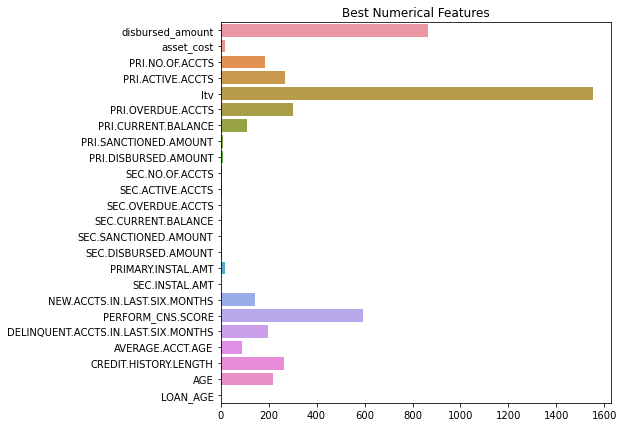

In [210]:
from sklearn.feature_selection import SelectKBest,f_classif,chi2
n = SelectKBest(score_func=f_classif,k=16)
# numcols=n.fit(dd11[numericalTypes],dd11['LOAN_DEFAULT'])
numcols=n.fit(X_train_numerical,y_train)
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numericalTypes)
plt.title('Best Numerical Features')
plt.show()

In [211]:
## Creating dictionaries to store the feature names and its importance value
topNumFeatures={}

## https://machinelearningmastery.com/feature-selection-with-categorical-data/ 
for i in range(len(n.scores_)):
    topNumFeatures[numericalTypes[i]]=n.scores_[i]

# SORT THE DICTIONARY AS PER THE IMPORTANT SCORES
topNumFeatures = sorted(topNumFeatures.items(), key=lambda x: x[1],reverse=True) 
print("-----------------------TOP FEATURES SORTED AS PER THE HIGH IMPORTANCE----------------")
topNumFeatures

-----------------------TOP FEATURES SORTED AS PER THE HIGH IMPORTANCE----------------


[('ltv', 1550.585501137707),
 ('disbursed_amount', 863.1517269795247),
 ('PERFORM_CNS.SCORE', 592.4396877417527),
 ('PRI.OVERDUE.ACCTS', 303.418914901505),
 ('PRI.ACTIVE.ACCTS', 269.9805998563447),
 ('CREDIT.HISTORY.LENGTH', 263.8419374463975),
 ('AGE', 218.36860946601638),
 ('DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 196.59119428463814),
 ('PRI.NO.OF.ACCTS', 187.15344185378814),
 ('NEW.ACCTS.IN.LAST.SIX.MONTHS', 142.81583194446142),
 ('PRI.CURRENT.BALANCE', 108.26241359280226),
 ('AVERAGE.ACCT.AGE', 87.55576365960778),
 ('asset_cost', 18.925304124945043),
 ('PRIMARY.INSTAL.AMT', 17.60327544288311),
 ('PRI.SANCTIONED.AMOUNT', 9.481264160694385),
 ('PRI.DISBURSED.AMOUNT', 9.063542106703114),
 ('SEC.NO.OF.ACCTS', 8.015915834127146),
 ('SEC.SANCTIONED.AMOUNT', 6.137398095563498),
 ('SEC.DISBURSED.AMOUNT', 5.962968052085749),
 ('SEC.CURRENT.BALANCE', 4.673842684589463),
 ('SEC.ACTIVE.ACCTS', 4.069622847418212),
 ('SEC.INSTAL.AMT', 0.16302967238609595),
 ('SEC.OVERDUE.ACCTS', 0.1342148080490516

In [212]:
X_test_numerical.columns

Index(['disbursed_amount', 'asset_cost', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'ltv', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'AGE', 'LOAN_AGE'],
      dtype='object')

In [213]:
X_train_numerical.rename(columns={"disbursed_amount":"DISBURSED_AMOUNT","asset_cost":"ASSET_COST",
                                  "PRI.NO.OF.ACCTS":"PRI_NO_OF_ACCTS","PRI.ACTIVE.ACCTS":"PRI_ACTIVE_ACCTS",
                  "ltv":"LTV","PRI.OVERDUE.ACCTS":"PRI_OVERDUE_ACCTS","PRI.CURRENT.BALANCE":"PRI_CURRENT_BALANCE",
                   "PRI.SANCTIONED.AMOUNT":"PRI_SANCTIONED_AMOUNT","PRI.DISBURSED.AMOUNT":"PRI_DISBURSED_AMOUNT",
                  "SEC.NO.OF.ACCTS":"SEC_NO_OF_ACCTS","SEC.ACTIVE.ACCTS":"SEC_ACTIVE_ACCTS","SEC.OVERDUE.ACCTS":"SEC_OVERDUE_ACCTS",
                  "SEC.CURRENT.BALANCE":"SEC_CURRENT_BALANCE","SEC.SANCTIONED.AMOUNT":"SEC_SANCTIONED_AMOUNT","SEC.DISBURSED.AMOUNT":"SEC_DISBURSED_AMOUNT",
                  "PRIMARY.INSTAL.AMT":"PRIMARY_INSTAL_AMT","SEC.INSTAL.AMT":"SEC_INSTAL_AMT","NEW.ACCTS.IN.LAST.SIX.MONTHS":"NEW_ACCTS_IN_LAST_SIX_MONTHS",
                  "PERFORM_CNS.SCORE":"PERFORM_CNS_SCORE","DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                  "AVERAGE.ACCT.AGE":"AVERAGE_ACCT_AGE","CREDIT.HISTORY.LENGTH":"CREDIT_HISTORY_LENGTH"},inplace=True)

In [214]:
X_test_numerical.rename(columns={"disbursed_amount":"DISBURSED_AMOUNT","asset_cost":"ASSET_COST",
                                  "PRI.NO.OF.ACCTS":"PRI_NO_OF_ACCTS","PRI.ACTIVE.ACCTS":"PRI_ACTIVE_ACCTS",
                  "ltv":"LTV","PRI.OVERDUE.ACCTS":"PRI_OVERDUE_ACCTS","PRI.CURRENT.BALANCE":"PRI_CURRENT_BALANCE",
                   "PRI.SANCTIONED.AMOUNT":"PRI_SANCTIONED_AMOUNT","PRI.DISBURSED.AMOUNT":"PRI_DISBURSED_AMOUNT",
                  "SEC.NO.OF.ACCTS":"SEC_NO_OF_ACCTS","SEC.ACTIVE.ACCTS":"SEC_ACTIVE_ACCTS","SEC.OVERDUE.ACCTS":"SEC_OVERDUE_ACCTS",
                  "SEC.CURRENT.BALANCE":"SEC_CURRENT_BALANCE","SEC.SANCTIONED.AMOUNT":"SEC_SANCTIONED_AMOUNT","SEC.DISBURSED.AMOUNT":"SEC_DISBURSED_AMOUNT",
                  "PRIMARY.INSTAL.AMT":"PRIMARY_INSTAL_AMT","SEC.INSTAL.AMT":"SEC_INSTAL_AMT","NEW.ACCTS.IN.LAST.SIX.MONTHS":"NEW_ACCTS_IN_LAST_SIX_MONTHS",
                  "PERFORM_CNS.SCORE":"PERFORM_CNS_SCORE","DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS":"DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                  "AVERAGE.ACCT.AGE":"AVERAGE_ACCT_AGE","CREDIT.HISTORY.LENGTH":"CREDIT_HISTORY_LENGTH"},inplace=True)

In [215]:
X_train_numerical.loc[:,'No_of_Accounts'] = X_train_numerical['PRI_NO_OF_ACCTS'] + X_train_numerical['SEC_NO_OF_ACCTS']
X_train_numerical.loc[:,'PRI_Inactive_accounts'] = X_train_numerical['PRI_NO_OF_ACCTS'] - X_train_numerical['PRI_ACTIVE_ACCTS']
X_train_numerical.loc[:,'SEC_Inactive_accounts'] = X_train_numerical['SEC_NO_OF_ACCTS'] - X_train_numerical['SEC_ACTIVE_ACCTS']
X_train_numerical.loc[:,'Total_Inactive_accounts'] = X_train_numerical['PRI_Inactive_accounts'] + X_train_numerical['SEC_Inactive_accounts']
X_train_numerical.loc[:,'Total_Overdue_Accounts'] = X_train_numerical['PRI_OVERDUE_ACCTS'] + X_train_numerical['SEC_OVERDUE_ACCTS']
X_train_numerical.loc[:,'Total_Current_Balance'] = X_train_numerical['PRI_CURRENT_BALANCE'] + X_train_numerical['SEC_CURRENT_BALANCE']
X_train_numerical.loc[:,'Total_Sanctioned_Amount'] = X_train_numerical['PRI_SANCTIONED_AMOUNT'] + X_train_numerical['SEC_SANCTIONED_AMOUNT']
X_train_numerical.loc[:,'Total_Disbursed_Amount'] = X_train_numerical['PRI_DISBURSED_AMOUNT'] + X_train_numerical['SEC_DISBURSED_AMOUNT']
X_train_numerical.loc[:,'Total_Installment'] = X_train_numerical['PRIMARY_INSTAL_AMT'] + X_train_numerical['SEC_INSTAL_AMT']



X_test_numerical.loc[:,'No_of_Accounts'] = X_test_numerical['PRI_NO_OF_ACCTS'] + X_test_numerical['SEC_NO_OF_ACCTS']
X_test_numerical.loc[:,'PRI_Inactive_accounts'] = X_test_numerical['PRI_NO_OF_ACCTS'] - X_test_numerical['PRI_ACTIVE_ACCTS']
X_test_numerical.loc[:,'SEC_Inactive_accounts'] = X_test_numerical['SEC_NO_OF_ACCTS'] - X_test_numerical['SEC_ACTIVE_ACCTS']
X_test_numerical.loc[:,'Total_Inactive_accounts'] = X_test_numerical['PRI_Inactive_accounts'] + X_test_numerical['SEC_Inactive_accounts']
X_test_numerical.loc[:,'Total_Overdue_Accounts'] = X_test_numerical['PRI_OVERDUE_ACCTS'] + X_test_numerical['SEC_OVERDUE_ACCTS']
X_test_numerical.loc[:,'Total_Current_Balance'] = X_test_numerical['PRI_CURRENT_BALANCE'] + X_test_numerical['SEC_CURRENT_BALANCE']
X_test_numerical.loc[:,'Total_Sanctioned_Amount'] = X_test_numerical['PRI_SANCTIONED_AMOUNT'] + X_test_numerical['SEC_SANCTIONED_AMOUNT']
X_test_numerical.loc[:,'Total_Disbursed_Amount'] = X_test_numerical['PRI_DISBURSED_AMOUNT'] + X_test_numerical['SEC_DISBURSED_AMOUNT']
X_test_numerical.loc[:,'Total_Installment'] = X_test_numerical['PRIMARY_INSTAL_AMT'] + X_test_numerical['SEC_INSTAL_AMT']

In [216]:
X_test_numerical.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'LTV', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'PERFORM_CNS_SCORE',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'AGE', 'LOAN_AGE', 'No_of_Accounts',
       'PRI_Inactive_accounts', 'SEC_Inactive_accounts',
       'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'],
      dtype='object')

In [217]:
X_train_numerical.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'LTV', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'PERFORM_CNS_SCORE',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'AVERAGE_ACCT_AGE',
       'CREDIT_HISTORY_LENGTH', 'AGE', 'LOAN_AGE', 'No_of_Accounts',
       'PRI_Inactive_accounts', 'SEC_Inactive_accounts',
       'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'],
      dtype='object')

In [218]:
print("Shape of X_train_numerical: ",X_train_numerical.shape)
print("Shape of X_test_numerical: ",X_test_numerical.shape)

Shape of X_train_numerical:  (163207, 33)
Shape of X_test_numerical:  (69947, 33)


Now dropping the unwanted columns as we have already merged them

In [219]:
X_train_numerical=X_train_numerical.drop(['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS',
			'PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS',
			'PRI_CURRENT_BALANCE','SEC_CURRENT_BALANCE',
			'PRI_Inactive_accounts','SEC_Inactive_accounts',
            'PRI_SANCTIONED_AMOUNT','SEC_SANCTIONED_AMOUNT',
            'PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT',
            'PRI_OVERDUE_ACCTS','SEC_OVERDUE_ACCTS',
            'PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT'],axis=1)

X_test_numerical=X_test_numerical.drop(['PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS',
			'PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS',
			'PRI_CURRENT_BALANCE','SEC_CURRENT_BALANCE',
			'PRI_Inactive_accounts','SEC_Inactive_accounts',
            'PRI_SANCTIONED_AMOUNT','SEC_SANCTIONED_AMOUNT',
            'PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT',
            'PRI_OVERDUE_ACCTS','SEC_OVERDUE_ACCTS',
            'PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT'],axis=1) 

In [220]:
X_train_numerical.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'PERFORM_CNS_SCORE', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'AGE', 'LOAN_AGE',
       'No_of_Accounts', 'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'],
      dtype='object')

In [221]:
X_test_numerical.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'PERFORM_CNS_SCORE', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'AGE', 'LOAN_AGE',
       'No_of_Accounts', 'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'],
      dtype='object')

In [222]:
print("After Droping: Shape of X_train_numerical: ",X_train_numerical.shape)
print("After Droping: Shape of X_test_numerical: ",X_test_numerical.shape)

After Droping: Shape of X_train_numerical:  (163207, 17)
After Droping: Shape of X_test_numerical:  (69947, 17)


In [223]:
numericalTypesUpdated=['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 
           'PERFORM_CNS_SCORE','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'LOAN_AGE','AGE',
           'AVERAGE_ACCT_AGE','CREDIT_HISTORY_LENGTH',
           'No_of_Accounts', 'Total_Inactive_accounts','Total_Overdue_Accounts', 
           'Total_Current_Balance','Total_Sanctioned_Amount', 'Total_Disbursed_Amount','Total_Installment']

In [224]:
X_train.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,AGE,LOAN_AGE
81759,56013,67722,85.64,Self employed,1,0,0,0,0,738,...,0,0,0,0,1,0,0.333333,0.333333,41.0,2.0
115977,53278,68455,79.76,Self employed,1,0,0,0,0,694,...,0,0,1932,0,0,0,0.583333,0.583333,26.0,2.0
51043,27929,62459,48.03,Salaried,1,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,41.0,2.0
18380,35275,64929,56.99,Self employed,1,0,0,0,0,690,...,0,0,0,0,2,0,1.333333,3.083333,57.0,2.0
192570,67582,81193,84.98,Self employed,1,0,0,0,0,681,...,0,0,3360,0,0,1,0.833333,0.916667,21.0,2.0


STANDARDIZING THE TRAIN AND TEST DATA

In [227]:
scaler = StandardScaler()
scaler.fit(X_train_numerical)
X_train_numerical_std = scaler.transform(X_train_numerical)
X_test_numerical_std = scaler.transform(X_test_numerical)


In [232]:
type(X_train_numerical_std)

numpy.ndarray

In [233]:
X_train_numerical_std

array([[ 0.12597068, -0.42587753,  0.95032085, ..., -0.07753104,
        -0.07722877, -0.08735027],
       [-0.08282314, -0.38748117,  0.43681283, ..., -0.05807032,
        -0.0577724 , -0.07493134],
       [-2.01800212, -0.70156649, -2.33420921, ..., -0.08286073,
        -0.08255726, -0.08735027],
       ...,
       [-0.80264651, -0.77799252, -0.01468998, ..., -0.08286073,
        -0.08255726, -0.08735027],
       [-0.27176819, -0.36338524, -0.00246359, ..., -0.08286073,
        -0.08255726, -0.07835747],
       [-0.57362221, -0.04463788, -0.88101644, ..., -0.08286073,
        -0.08255726, -0.07700759]])

In [234]:
X_train_numerical_std=pd.DataFrame(X_train_numerical_std,columns=['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'PERFORM_CNS_SCORE', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'LOAN_AGE',
       'AGE', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'No_of_Accounts',
       'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'])

X_test_numerical_std=pd.DataFrame(X_test_numerical_std,columns=['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'PERFORM_CNS_SCORE', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'LOAN_AGE',
       'AGE', 'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'No_of_Accounts',
       'Total_Inactive_accounts', 'Total_Overdue_Accounts',
       'Total_Current_Balance', 'Total_Sanctioned_Amount',
       'Total_Disbursed_Amount', 'Total_Installment'])

In [235]:
X_test_numerical_std

,DISBURSED_AMOUNT,ASSET_COST,LTV,NEW_ACCTS_IN_LAST_SIX_MONTHS,PERFORM_CNS_SCORE,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,LOAN_AGE,AGE,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,No_of_Accounts,Total_Inactive_accounts,Total_Overdue_Accounts,Total_Current_Balance,Total_Sanctioned_Amount,Total_Disbursed_Amount,Total_Installment
0,1.846783,1.417514,0.430700,1.683279,0.600985,2.329579,0.600733,1.114040,1.577157,0.0,0.092888,-0.350434,1.469032,1.185451,0.405633,0.405827,-0.018011
1,-0.764476,-0.762278,0.024609,-0.398491,-0.855044,-0.252379,-0.588880,-0.568307,0.761727,0.0,-0.467555,-0.350434,-0.286717,-0.181252,-0.082861,-0.082557,-0.087350
2,-0.007932,-0.633050,1.140703,-0.398491,0.648240,-0.252379,0.865092,3.988050,0.761727,0.0,3.081920,3.798655,3.224780,-0.181252,-0.053786,-0.053489,-0.003664
3,-0.944260,-0.318336,-1.197156,-0.398491,-0.855044,-0.252379,-0.588880,-0.568307,0.048227,0.0,-0.467555,-0.350434,-0.286717,-0.181252,-0.082861,-0.082557,-0.087350
4,-0.821732,-0.718434,-0.133461,1.683279,0.214089,-0.252379,0.204195,0.342964,-0.053702,0.0,2.334662,1.602079,8.492026,20.416553,7.884109,7.882629,2.095547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69942,0.832282,0.591600,0.285730,-0.398491,-0.855044,-0.252379,-0.588880,-0.568307,-1.480703,0.0,-0.467555,-0.350434,-0.286717,-0.181252,-0.082861,-0.082557,-0.087350
69943,0.179410,-0.234158,0.811464,-0.398491,-0.855044,-0.252379,-0.588880,-0.568307,0.659799,0.0,-0.467555,-0.350434,-0.286717,-0.181252,-0.082861,-0.082557,-0.087350
69944,-0.042744,-0.329127,0.375681,-0.398491,1.551982,-0.252379,0.138106,0.448111,-0.155631,0.0,1.587404,2.334271,-0.286717,-0.181252,-0.082861,-0.082557,-0.063129
69945,1.110775,0.404489,0.890062,4.805935,1.235968,-0.252379,-0.390611,-0.252867,-0.767203,0.0,0.653332,-0.106370,-0.286717,-0.128997,-0.053237,-0.052940,-0.087350


In [236]:
print("Shape of Standardized X_train: ",X_train_numerical_std.shape)
print("Shape of Standardized X_test: ",X_test_numerical_std.shape)

Shape of Standardized X_train:  (163207, 17)
Shape of Standardized X_test:  (69947, 17)


C:\Users\jagdi\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\jagdi\Anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


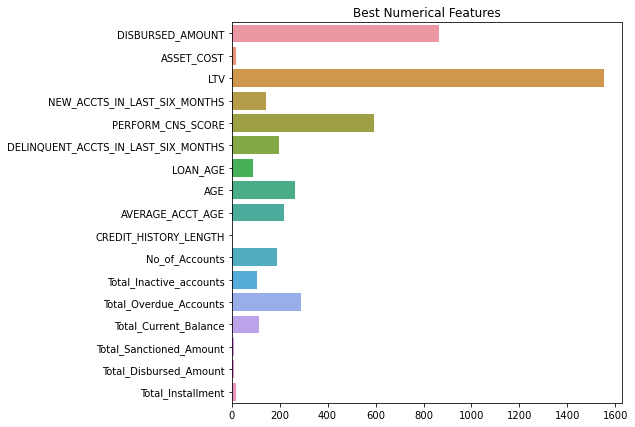

In [237]:
nn = SelectKBest(score_func=f_classif,k='all')
numcols=nn.fit(X_train_numerical_std,y_train)
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=X_train_numerical_std.columns)
plt.title('Best Numerical Features')
plt.show()

In [238]:
## Creating dictionaries to store the feature names and its importance value
topNumFeatures={}

## https://machinelearningmastery.com/feature-selection-with-categorical-data/ 
for i in range(len(nn.scores_)):
#     print('Feature %s: %f' % (numerical[i], n.scores_[i]))
    topNumFeatures[numericalTypesUpdated[i]]=nn.scores_[i]

# SORT THE DICTIONARY AS PER THE IMPORTANT SCORES
topNumFeatures = sorted(topNumFeatures.items(), key=lambda x: x[1],reverse=True) 
print("-----------------------TOP FEATURES SORTED AS PER THE HIGH IMPORTANCE----------------")
topNumFeatures

-----------------------TOP FEATURES SORTED AS PER THE HIGH IMPORTANCE----------------


[('LTV', 1550.5855011386789),
 ('DISBURSED_AMOUNT', 863.1517269793808),
 ('PERFORM_CNS_SCORE', 592.4396877413718),
 ('CREDIT_HISTORY_LENGTH', nan),
 ('Total_Overdue_Accounts', 288.9355920288955),
 ('AGE', 263.84193744638105),
 ('AVERAGE_ACCT_AGE', 218.36860946602857),
 ('DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 196.5911942848705),
 ('No_of_Accounts', 191.24014036474725),
 ('NEW_ACCTS_IN_LAST_SIX_MONTHS', 142.81583194445406),
 ('Total_Current_Balance', 112.26023331694557),
 ('Total_Inactive_accounts', 104.3813781424166),
 ('LOAN_AGE', 87.55576365955291),
 ('ASSET_COST', 18.925304124725937),
 ('Total_Installment', 17.741177619471454),
 ('Total_Sanctioned_Amount', 10.296019203093188),
 ('Total_Disbursed_Amount', 9.846072313550028)]

ENCODING THE CATEGORICAL VARIABLE USING ONE HOT ENCODER

In [239]:
X_train_categorical=X_train[categoricalTypes].copy()
X_test_categorical=X_test[categoricalTypes].copy()

In [240]:
X_train_categorical.columns

Index(['Employment.Type', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION'],
      dtype='object')

In [241]:
onehot_encoder = OneHotEncoder(sparse=False)
X_train_categorical_encoded = onehot_encoder.fit(X_train_categorical) 
X_train_categorical_encoded = onehot_encoder.transform(X_train_categorical) ## NOT EXECUTED
X_test_categorical_encoded = onehot_encoder.transform(X_test_categorical)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
X_train_categorical_encoded = onehot_encoder.fit(X_train_categorical)
X_train_categorical_encoded = onehot_encoder.transform(X_train_categorical) ## NOT EXECUTED
X_test_categorical_encoded = onehot_encoder.transform(X_test_categorical)

In [242]:
X_train_categorical_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [243]:
onehot_encoder.get_feature_names(['AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'DRIVING_FLAG',
       'PASSPORT_FLAG', 'EMPLOYMENT_TYPE', 'PERFORM_CNS_SCORE_DESCRIPTION'])

array(['AADHAR_FLAG_Salaried', 'AADHAR_FLAG_Self employed', 'PAN_FLAG_0',
       'PAN_FLAG_1', 'VOTERID_FLAG_0', 'VOTERID_FLAG_1', 'DRIVING_FLAG_0',
       'DRIVING_FLAG_1', 'PASSPORT_FLAG_0', 'PASSPORT_FLAG_1',
       'EMPLOYMENT_TYPE_0', 'EMPLOYMENT_TYPE_1',
       'PERFORM_CNS_SCORE_DESCRIPTION_High',
       'PERFORM_CNS_SCORE_DESCRIPTION_Low',
       'PERFORM_CNS_SCORE_DESCRIPTION_Medium',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored',
       'PERFORM_CNS_SCORE_DESCRIPTION_Very High'], dtype=object)

In [244]:
encodedCatColumnNames=['AADHAR_FLAG_0', 'AADHAR_FLAG_1', 'PAN_FLAG_0', 'PAN_FLAG_1',
       'VOTERID_FLAG_0', 'VOTERID_FLAG_1', 'DRIVING_FLAG_0',
       'DRIVING_FLAG_1', 'PASSPORT_FLAG_0', 'PASSPORT_FLAG_1',
       'EMPLOYMENT_TYPE_Salaried', 'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_High',
       'PERFORM_CNS_SCORE_DESCRIPTION_Low',
       'PERFORM_CNS_SCORE_DESCRIPTION_Medium',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not_Scored',
       'PERFORM_CNS_SCORE_DESCRIPTION_Very_High']

In [245]:
X_train_categorical_encoded=pd.DataFrame(X_train_categorical_encoded,columns=['AADHAR_FLAG_0', 'AADHAR_FLAG_1', 'PAN_FLAG_0', 'PAN_FLAG_1',
       'VOTERID_FLAG_0', 'VOTERID_FLAG_1', 'DRIVING_FLAG_0',
       'DRIVING_FLAG_1', 'PASSPORT_FLAG_0', 'PASSPORT_FLAG_1',
       'EMPLOYMENT_TYPE_Salaried', 'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_High',
       'PERFORM_CNS_SCORE_DESCRIPTION_Low',
       'PERFORM_CNS_SCORE_DESCRIPTION_Medium',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not_Scored',
       'PERFORM_CNS_SCORE_DESCRIPTION_Very_High'])

X_test_categorical_encoded=pd.DataFrame(X_test_categorical_encoded,columns=['AADHAR_FLAG_0', 'AADHAR_FLAG_1', 'PAN_FLAG_0', 'PAN_FLAG_1',
       'VOTERID_FLAG_0', 'VOTERID_FLAG_1', 'DRIVING_FLAG_0',
       'DRIVING_FLAG_1', 'PASSPORT_FLAG_0', 'PASSPORT_FLAG_1',
       'EMPLOYMENT_TYPE_Salaried', 'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_High',
       'PERFORM_CNS_SCORE_DESCRIPTION_Low',
       'PERFORM_CNS_SCORE_DESCRIPTION_Medium',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not_Scored',
       'PERFORM_CNS_SCORE_DESCRIPTION_Very_High'])

In [246]:
X_train_categorical_encoded

,AADHAR_FLAG_0,AADHAR_FLAG_1,PAN_FLAG_0,PAN_FLAG_1,VOTERID_FLAG_0,VOTERID_FLAG_1,DRIVING_FLAG_0,DRIVING_FLAG_1,PASSPORT_FLAG_0,PASSPORT_FLAG_1,EMPLOYMENT_TYPE_Salaried,EMPLOYMENT_TYPE_Self employed,PERFORM_CNS_SCORE_DESCRIPTION_High,PERFORM_CNS_SCORE_DESCRIPTION_Low,PERFORM_CNS_SCORE_DESCRIPTION_Medium,PERFORM_CNS_SCORE_DESCRIPTION_Not_Scored,PERFORM_CNS_SCORE_DESCRIPTION_Very_High
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163202,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
163203,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
163204,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
163205,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [247]:
print("Shape of Encoded X_train Categorical: ",X_train_categorical_encoded.shape)
print("Shape of Encoded X_test Categorical: ",X_test_categorical_encoded.shape)

Shape of Encoded X_train Categorical:  (163207, 17)
Shape of Encoded X_test Categorical:  (69947, 17)


SELECTING THE TOP CATEGORICAL FEATURES

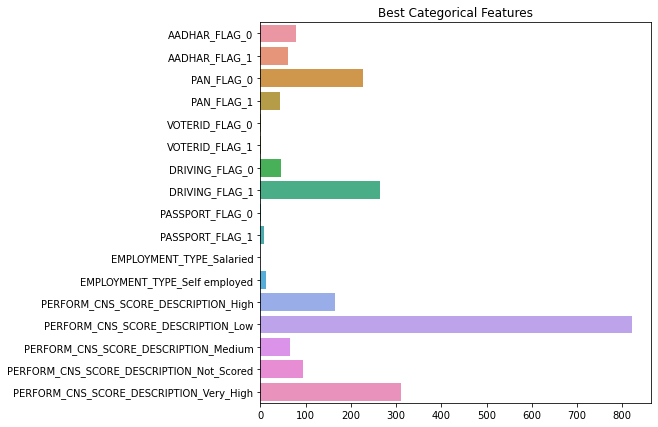

In [248]:
c = SelectKBest(score_func=chi2)
numcols=c.fit(X_train_categorical_encoded,y_train)
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=encodedCatColumnNames)
plt.title('Best Categorical Features')
plt.show()

MERGING THE NUMERICAL AND CATEGORICAL PROCESSSED FEATURES

In [249]:
X_train_merged = pd.concat([X_train_numerical_std,X_train_categorical_encoded], axis=1)
X_test_merged = pd.concat([X_test_numerical_std,X_test_categorical_encoded], axis=1)

In [252]:
X_train_numerical_std.shape
X_test_numerical_std.shape

(69947, 17)

In [256]:
print("Shape of X_train Merged: ",X_train_merged.shape)
print("Shape of X_test Merged: ",X_test_merged.shape)

Shape of X_train Merged:  (163207, 34)
Shape of X_test Merged:  (69947, 34)


In [255]:
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of y_train :  (163207,)
Shape of y_test :  (69947,)


CORELATION MATRIX

In [269]:
y_train_corr=pd.DataFrame(y_train)
y_test_corr=pd.DataFrame(y_test)
type(y_train_corr)

pandas.core.frame.DataFrame

In [270]:
y_train_corr=pd.DataFrame(y_train_corr,columns=['loan_default'])
y_test_corr=pd.DataFrame(y_test_corr,columns=['loan_default'])

In [272]:
X_train_corr=X_train_merged.copy()

In [277]:
X_train_corr['loan_default']=y_train.values

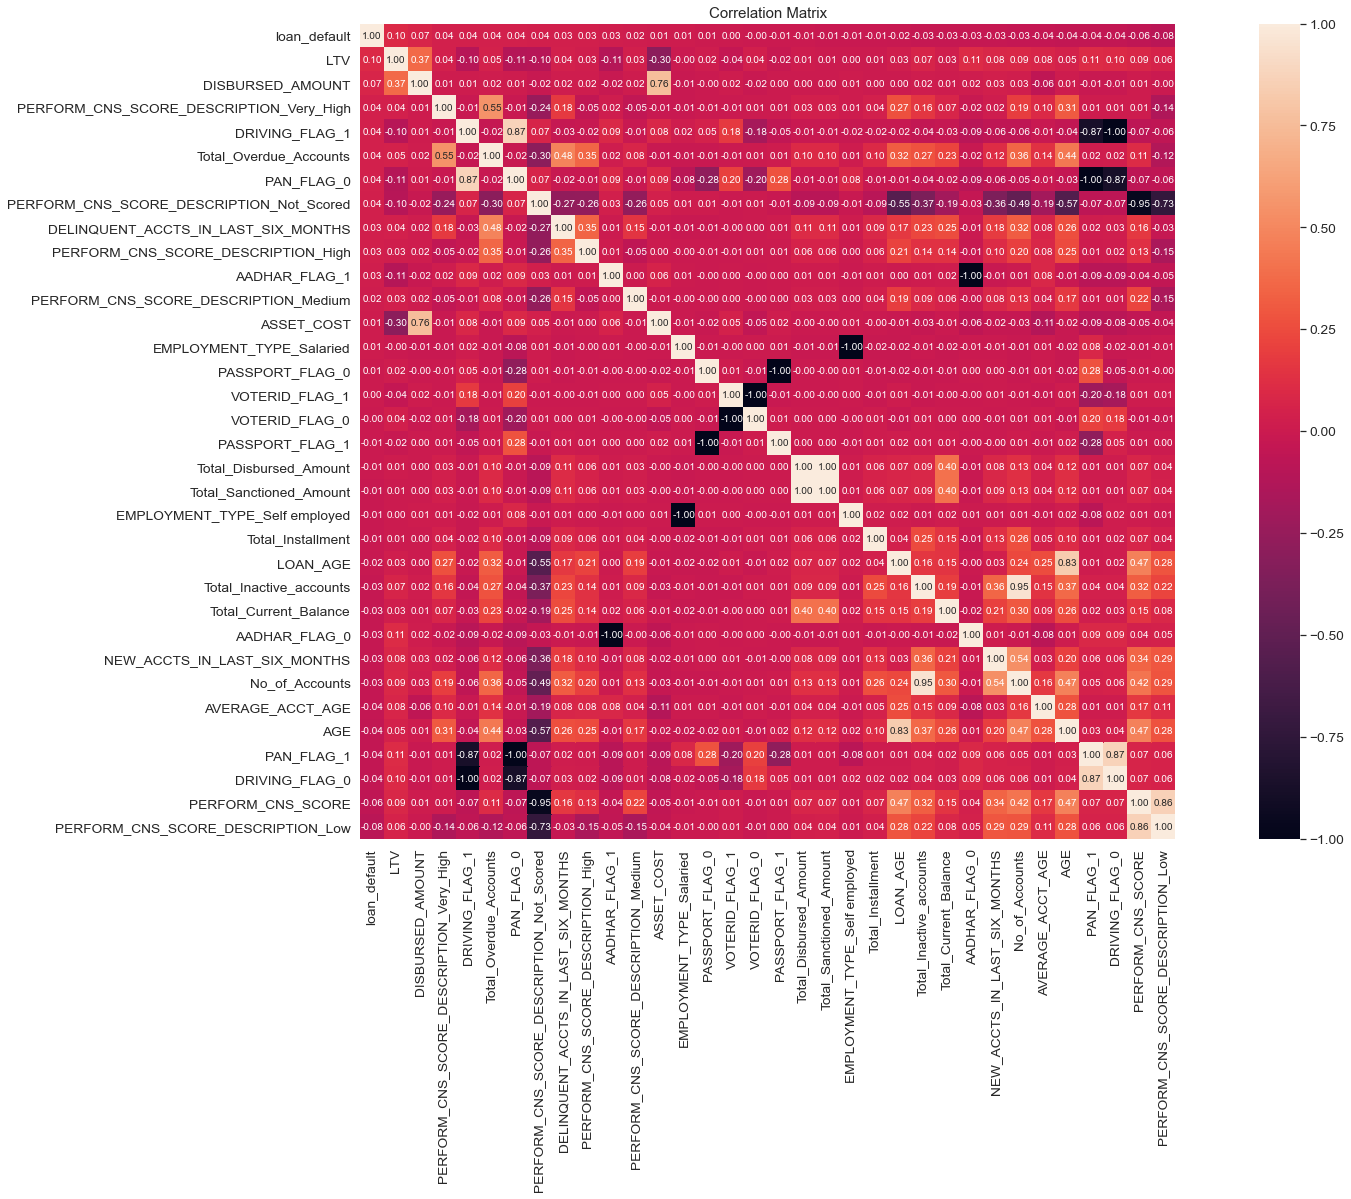

In [280]:
corr_mat = X_train_corr.corr()
fig2=plt.figure()
sns.set(rc={'figure.figsize':(30,15)})
k = 34
cols = corr_mat.nlargest(k, 'loan_default')['loan_default'].index
cm = np.corrcoef(X_train_corr[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Correlation Matrix')
plt.show()

------------------------------------------------------------------------------

MODEL IMPLEMENTATION

In [283]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [293]:
test_len=len(y_test)
print(test_len)
predicted = np.zeros((test_len,2))
predicted
print(y_test)

69947
1197      1
109250    0
171069    0
227346    0
136799    0
         ..
163258    1
127079    0
203495    0
62356     0
222966    0
Name: loan_default, Length: 69947, dtype: int64


Log loss on Test Data using Random Model 0.8855425052440363


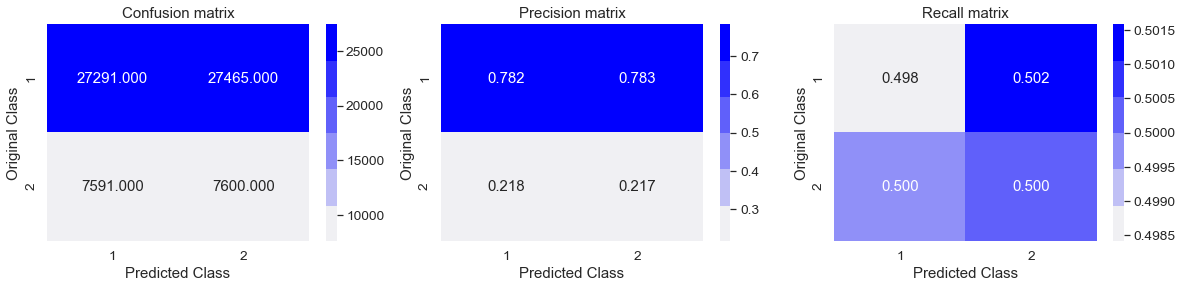

In [284]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [307]:
lr = LogisticRegression(C=5.0,class_weight="balanced")
knn = KNeighborsClassifier(weights='distance', algorithm='auto', n_neighbors=15)
rfc = RandomForestClassifier(n_estimators=300,criterion='gini',class_weight="balanced")
dtc = DecisionTreeClassifier(class_weight="balanced")

In [308]:
accuracy = {}
roc_r = {}

def train_model(model):
    # Checking accuracy
    model = model.fit(X_train_merged, y_train)
    pred = model.predict(X_test_merged)
    acc = accuracy_score(y_test, pred)*100
    accuracy[model] = acc
    print('accuracy_score',acc)
    print('precision_score',precision_score(y_test, pred)*100)
    print('recall_score',recall_score(y_test, pred)*100)
    print('f1_score',f1_score(y_test, pred)*100)
    roc_score = roc_auc_score(y_test, pred)*100
    roc_r[model] = roc_score
    print('roc_auc_score',roc_score)
    # confusion matrix
    print('confusion_matrix')
    plot_confusion_matrix(y_test,pred)
#     print(pd.DataFrame(confusion_matrix(y_test, pred)))
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)*100

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.rcParams["figure.figsize"] = [7,7]
#     plt.figure(figsize=(2,3))
#     plt.figure(figsize=(3,4))
    plt.show()

C:\Users\jagdi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy_score 56.25545055542053
precision_score 27.81697238459988
recall_score 63.59028372062405
f1_score 38.70347369686286
roc_auc_score 58.90541288083946
confusion_matrix


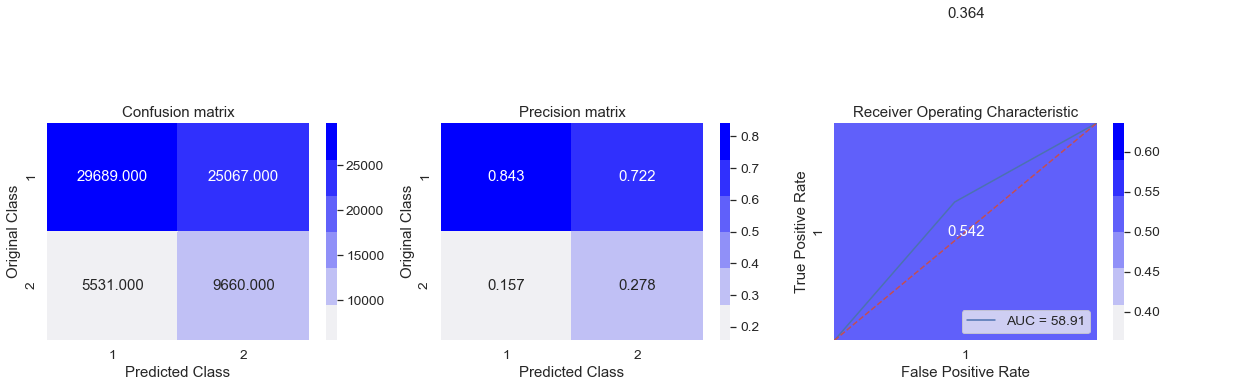

In [313]:
train_model(lr)

OBSERVATION:
### 1. The SKLearns Logistic Regression model has an accuracy of 57%, however as we can see from the Confusion Matrix, that the model is performing better as compared to the SGD Variant in classifying the Defaulters.
### 2. The AUC is roughly at 60 than compared to the Random Model's 50

DECISION TREE

accuracy_score 67.14369451155875
precision_score 24.633717522953702
recall_score 24.902903034691594
f1_score 24.76757889223517
roc_auc_score 51.88274671787176
confusion_matrix


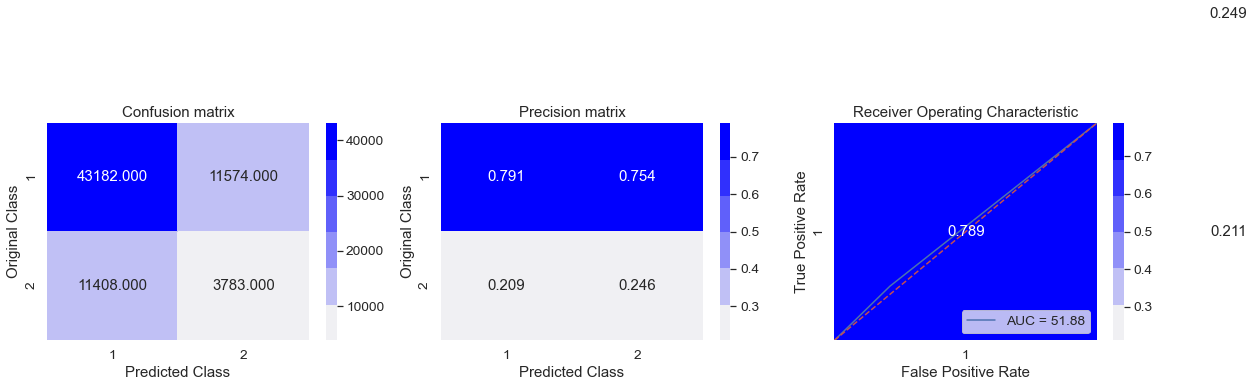

In [314]:
train_model(dtc)

OBSERVATION:
### 1. Decision Tree is performing poor in terms of Accuracy and AUC Scores.
### 2. The Precision and Recall Matrix show the improved performance in classifying the Defaulters.

 KNN

accuracy_score 77.04118832830572
precision_score 33.281972265023114
recall_score 5.6875781712856295
f1_score 9.714960364311013
roc_auc_score 51.26222724767071
confusion_matrix


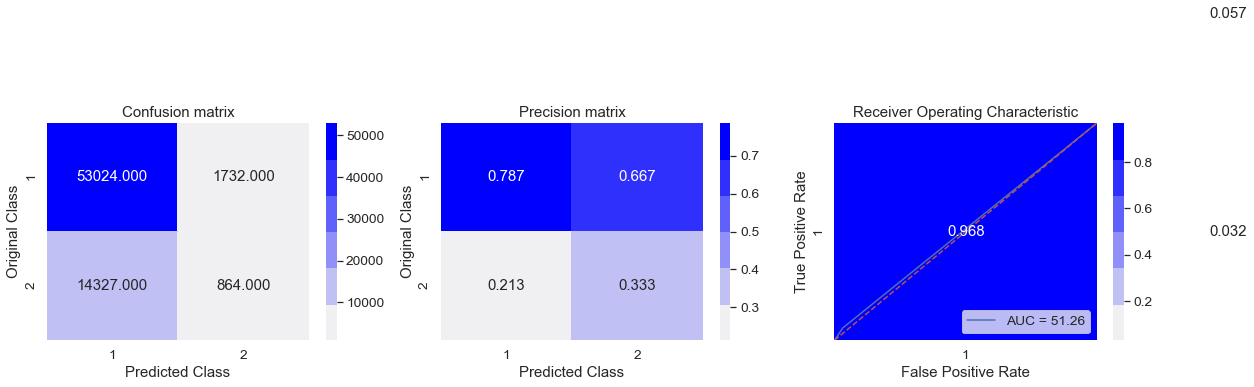

In [315]:
train_model(knn)

OBSERVATION:¶
### 1. KNN accuracy is very also high at 77 but the confusion matrix shows the poor performance in classifying defaulters than compared to the Logistic Regression which has lower accuracy.
### 2. AUC is same as Random Model

accuracy_score 77.28994810356413
precision_score 32.923228346456696
recall_score 4.40392337568297
f1_score 7.7686814143877365
roc_auc_score 50.9573492252803
confusion_matrix


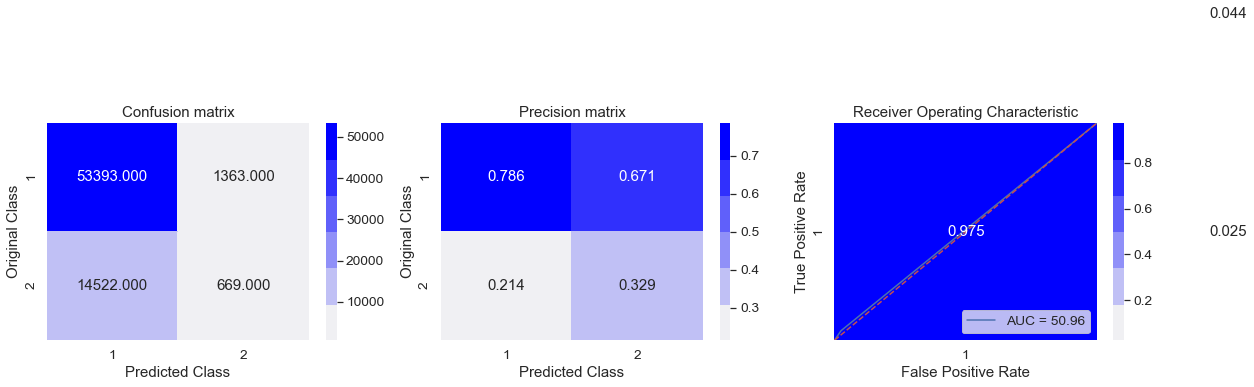

In [316]:
train_model(rfc)

OBSERVATION:
### 1. Random Forest accuracy is very high at 77 but the confusion matrix shows is poor performance in classifying defaulters than compared to the Logistic Regression which has lower accuracy.
### 2. AUC is same as Random Model.

C:\Users\jagdi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\jagdi\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


accuracy_score 64.85481864840523
precision_score 30.76198279393691
recall_score 49.43058389836087
f1_score 37.92328476553622
roc_auc_score 59.28228004180954
confusion_matrix


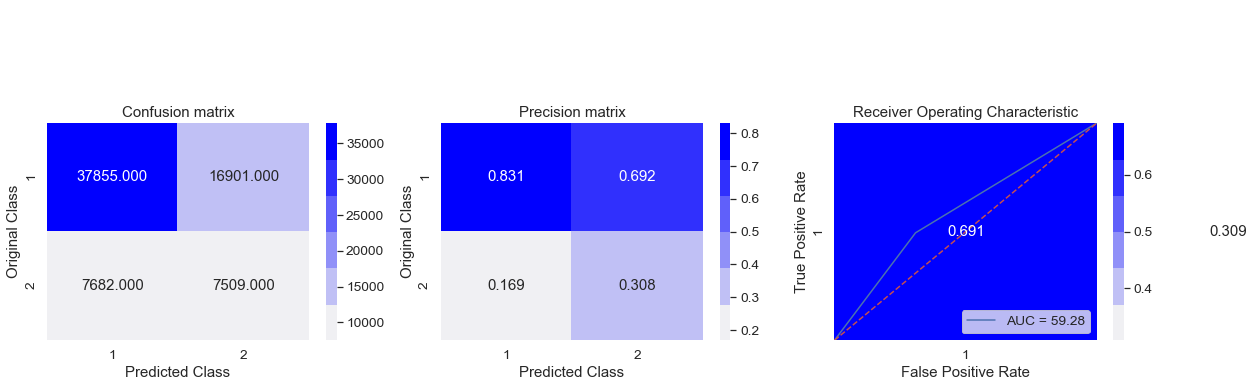

In [317]:
xgb = XGBClassifier(scale_pos_weight=3)
train_model(xgb)

OBSERVATION:
### 1. XGBoost_v1 accuracy is 65. The confusion matrix shows high performance in classifying defaulters than compared to other models excluding the Logistic Regression.
### 2. AUC is also high than all other models.

COMPARISION

In [318]:
from prettytable import PrettyTable 

# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Classifier", "Accuracy", "AUC"]) 

# Add rows 
myTable.add_row(["Random Model", "50.14", "50"]) 
myTable.add_row(["Logistic Regression->SGD", "78", "-"]) 
myTable.add_row(["Logistic Regression->SKLearn", "57", "59"]) 
myTable.add_row(["Decision Tree", "67", "52"]) 
myTable.add_row(["KNN", "77", "51"]) 
myTable.add_row(["Random Forest", "77", "51"]) 
myTable.add_row(["XGBoost v1", "65", "59"]) 
myTable.add_row(["XGBoost v2", "77", "53"]) 

print(myTable)

ModuleNotFoundError: No module named 'prettytable'

CONCLUSION
As per our experimentation with the EDA, Data Preprocessing, Cleaning and Modelling, we can conclude that the XGBOOST model version 1 gives us a balanced result of Prediction for Defaulters and also has a stable AUC value.¶